## Read and Explore data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
train_data = pd.read_csv('./data/train.csv')
train_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [2]:
# Separate the type variable into different columns
def create_new_columns(column):
    unique_col_values = np.unique(column)
    new_values = [[1 if a==True else 0 for a in column == u] for u in unique_col_values]
    col_names = [f'Type_{u}' for u in unique_col_values]
    new_df = pd.DataFrame(dict(zip(col_names, new_values)))
    return new_df  # Modify this as needed

# Apply the function to create new columns
df = train_data.join(create_new_columns(train_data.loc[:,'Type']))
df.drop(['Type','id', 'Product ID'],axis=1,inplace=True)
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1


#### Explore distribution of dummy variables

In [3]:
# List binary variable names
var_names = ['TWF','HDF','PWF','OSF','RNF', 'Machine failure']
outcome_name = 'Machine failure'

# Choose if plot plot and print values
plot = False
print_values = True

if plot:
    # Create a figure and axis
    fig, axes = plt.subplots(3,2)
    for ax,var_name in zip(axes.flatten(), var_names):
        var_values = np.unique(train_data[var_name])
        dist_arr = [train_data[train_data[var_name] == var_value].shape[0]/train_data.shape[0] for var_value in var_values]
        cmap = get_cmap('RdYlGn', len(dist_arr))
        # Plot a bar chart with automatically selected colors
        ax.set(xticks = var_values)
        ax.set_title(f'{var_name} distribution')
        ax.bar(var_values, height = dist_arr, width = 0.3, color=[cmap(i) for i in range(len(dist_arr))])

if print_values:
    for var_name in var_names:
        var_values = np.unique(train_data[var_name])
        dist_arr = [train_data[train_data[var_name] == var_value].shape[0]/train_data.shape[0] for var_value in var_values]
        print({var_name:dict(zip(var_values,dist_arr))})

{'TWF': {0: 0.9984460781798591, 1: 0.0015539218201408792}}
{'HDF': {0: 0.9948398067859473, 1: 0.005160193214052731}}
{'PWF': {0: 0.9976031488906317, 1: 0.002396851109368243}}
{'OSF': {0: 0.9960418972505846, 1: 0.003958102749415447}}
{'RNF': {0: 0.9977424154688519, 1: 0.0022575845311480695}}
{'Machine failure': {0: 0.9842555468412141, 1: 0.01574445315878589}}


#### Look at feature distribution for the continuous variables

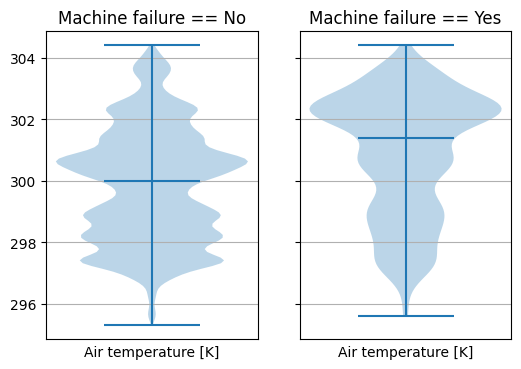

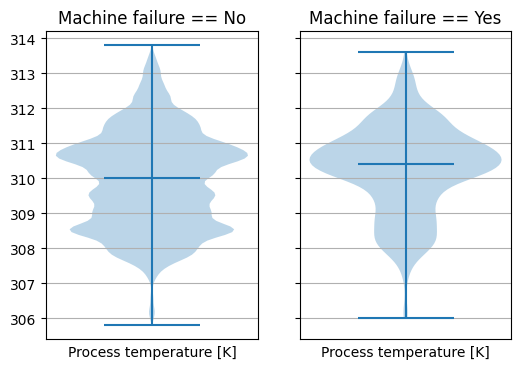

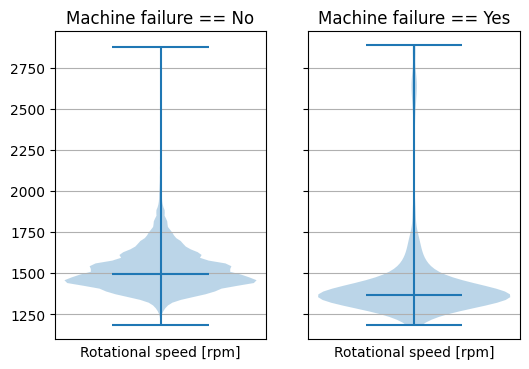

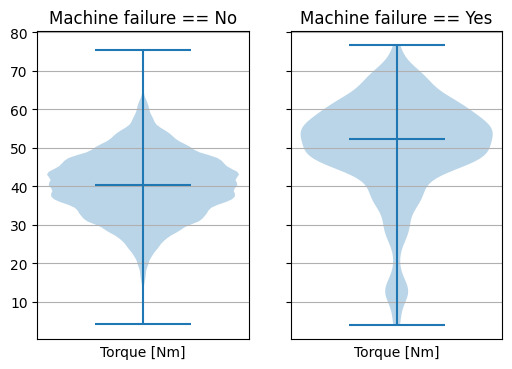

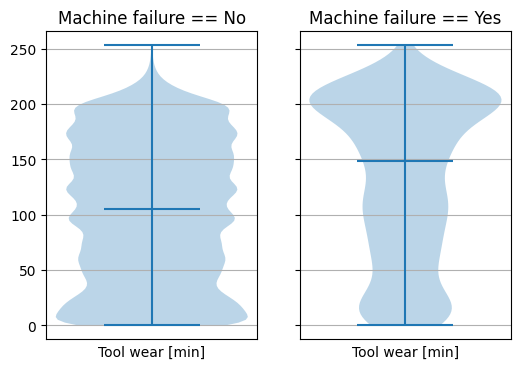

In [4]:
# Select only continuous variables
mf_no = df[df['Machine failure'] == 0].iloc[:,:5]
mf_yes = df[df['Machine failure'] == 1].iloc[:,:5]

# Plot violin plot for each variable according to machine failure
for col in mf_no.columns:
    fig, axs = plt.subplots(1,2,figsize=(6,4), sharey=True)
    axs[0].violinplot(mf_no[col], showmedians = True)
    axs[0].set_title('Machine failure == No')
    axs[1].violinplot(mf_yes[col], showmedians = True)
    axs[1].set_title('Machine failure == Yes')
    for ax in axs:
        ax.yaxis.grid(True)
        ax.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
        ax.set_xlabel(col)
    plt.show()

#### Encode 'Type' column as dummy variable

In [27]:
# Explore some correlations of each predictor with repsonse variable
from sklearn.feature_selection import r_regression
from sklearn.preprocessing import OneHotEncoder

var_names = ['TWF','HDF','PWF','OSF','RNF']
outcome_name = 'Machine failure'

# OneHot Encode Type variable
enc = OneHotEncoder(sparse_output=False, categories='auto')
encoded_type = enc.fit_transform(train_data.loc[:,'Type'].values.reshape(-1,1))

# Save preprocessed data to csv
df.to_csv('./data/preprocessed.csv')